# Single Variable Linear Regression

In [1]:
!pip install "kagglehub[pandas-datasets]"

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "cereal.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "crawford/80-cereals",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/var/folders/wb/bbx4x6g50r19sn7pzmhzhfpm0000gn/T/ipykernel_36839/2388762510.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:                         name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  


In [64]:
y = df["calories"]
x = df["sugars"]
y = y.to_numpy()
x = x.to_numpy()

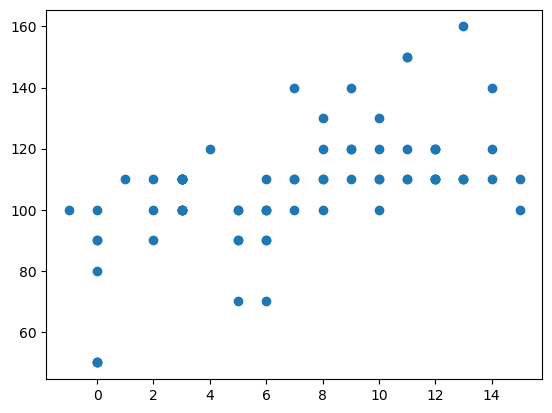

In [66]:
plt.scatter(x,y)
plt.show()

In [177]:
ALPHA = 0.01
ITERS = 10000

In [179]:
def grad_w(x, y, w, b):
    m = len(y)
    y_hat = w * x + b
    J_w = 1 / m * np.sum(x * (y_hat - y))
    return J_w
    
def grad_b(x, y, w, b):
    m = len(y)
    y_hat = w * x + b
    J_b = 1 / m * np.sum(y_hat - y)
    return J_b

def gradient_desc(x, y, w, b):
    for i in range(ITERS):
        w_ = w - ALPHA * grad_w(x, y, w, b)
        b_ = b - ALPHA * grad_b(x, y, w, b)
        w = w_
        b = b_
    return [w, b]

In [181]:
w = 0
b = 0
w, b = gradient_desc(x, y, w, b)
print(w)
print(b)

2.4650140981540645
89.82009721666476


In [183]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x.reshape(-1, 1), y)
w_skl = reg.coef_
b_skl = reg.intercept_

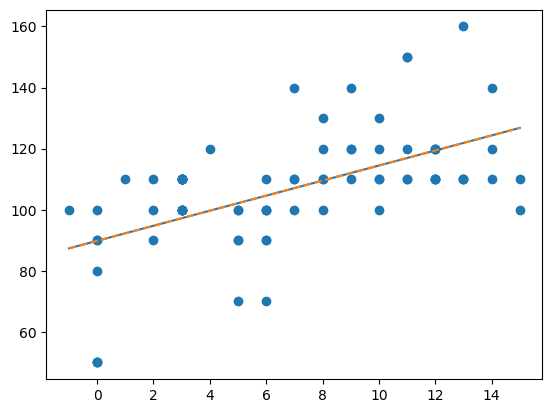

In [191]:
x_line = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x_line, w * x_line + b)
plt.plot(x_line, w_skl * x_line + b_skl, linestyle="dashed")
plt.scatter(x,y)
plt.show()